In [ ]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()

# 프로젝트 루트 추가 (노트북이 있는 디렉토리)
project_root = os.path.dirname(os.path.abspath("__file__")) if "__file__" in globals() else os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import time
import functools
def benchmark_runtime_decorator(func):
    @functools.wraps(func)
    def wrapper_benchmark_runtime(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        elapsed_minute = int(elapsed_time / 60) if elapsed_time >= 60 else None
        print(f"Function '{func.__name__}' executed in {f"{elapsed_minute} minutes " if elapsed_minute else ""}{elapsed_time%60:.4f} seconds")
        print(f"Function '{func.__name__}' executed in {elapsed_time:.4f} seconds")
        return result

    return wrapper_benchmark_runtime

In [2]:
from typing import cast
from workflow.rag_agent_workflow_part2 import app_part2, AgentState

initial_state = {
    "job_id": "test_job_001",
    "task_id": "test_task_001",
    "job_info": {
        "description": "정보유출 의심 사례 분석",
        "pc_username": "이정호",
        "pc_userrank": "주임",
        "pc_usercompany": "한국정보보호산업협회"
    },
    "collection_name": "artifacts_collection",
    "db_config": None,
    "filtered_artifacts": [],  # Part 1에서 필터링된 아티팩트 (실제로는 데이터 있음)
    "data_save_status": "success",
    "raw_user_requirements": """
사내에서 활용되는 교육생 개인정보유출 의심 활동을 분석해주세요.
이정호 주임은 한국정보보호산업협회에서 교육프로그램 운영 실무자로, 보안 전문가 육성 관련 프로그램을 기획하고 진행하는 업무를 합니다. 따라서 기존 업무의 특성을 고려하여 정보를 수집해 주세요."""
}


print("📝 초기 상태:")
print(f"  - Job ID: {initial_state['job_id']}")
print(f"  - Task ID: {initial_state['task_id']}")
print(f"  - 사용자 요구사항: {initial_state['raw_user_requirements']}")
print(f"  - 컬렉션: {initial_state['collection_name']}")

✅ Graph compiled successfully!
✅ Part 2 Graph compiled successfully (에이전트 분석 및 보고서 생성)!
📝 초기 상태:
  - Job ID: test_job_001
  - Task ID: test_task_001
  - 사용자 요구사항: 
사내에서 활용되는 교육생 개인정보유출 의심 활동을 분석해주세요.
이정호 주임은 한국정보보호산업협회에서 교육프로그램 운영 실무자로, 보안 전문가 육성 관련 프로그램을 기획하고 진행하는 업무를 합니다. 따라서 기존 업무의 특성을 고려하여 정보를 수집해 주세요.
  - 컬렉션: artifacts_collection


g:\s_dev\unknown\generator\generator\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:937: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `Settings` to V2.
  warnings.warn(
g:\s_dev\unknown\generator\generator\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:937: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `Settings` to V2.
  warnings.warn(


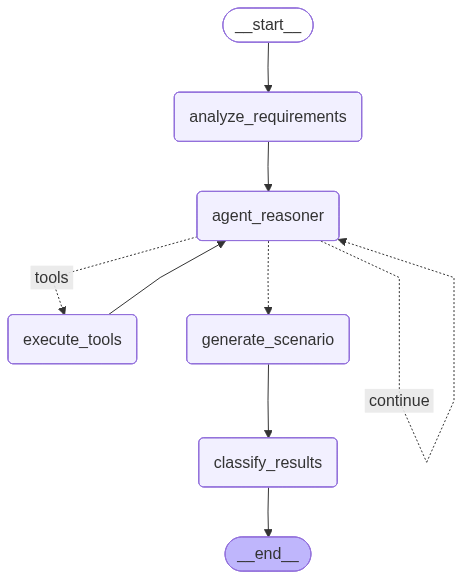

In [3]:
from IPython.display import Image, display
display(Image(app_part2.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
try:
    initial_state = cast(AgentState, initial_state)
    # 워크플로우 실행
    print("🚀 워크플로우 실행 시작...\n")
    @benchmark_runtime_decorator
    def run_workflow(initial_state):
        final_state = app_part2.invoke(
            initial_state,
            config={"recursion_limit": 80}  # 재귀 제한 증가
        )  # type: ignore
        return final_state
    final_state = run_workflow(initial_state)

    print("\n" + "="*60)
    print("✅ 워크플로우 실행 완료!")
    print("="*60 + "\n")
        
except Exception as e:
    print(f"\n❌ 오류 발생: {e}")
    import traceback
    traceback.print_exc()

🚀 워크플로우 실행 시작...

--- 📋 Node: 요구사항 분석 중... ---
  ✅ 요구사항 분석 완료
     - 사용자 요구사항: 2201자
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 2개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 4개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 6개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 8개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 10개
  💭 추론: [{'type': 'text', 'text': "## 분석 요약\n\n초기 분석 결과, 정보유출 가능성을 시사하는 몇 가지 중요한 증거를 발견했습니다. 이정호 주임은 업무용 PC를 사용하여 다수의 교육생 개별 활동 보고서 및 멘토링 보고서 파일을 다운로드한 기록이 확인되었습니다. 특히, 이 파일들은 정식 업무 시스템이 아닌 **Discord(디스코드)**를 통해 다운로드되었으며, 파일명에 '강서현', '김경훈', '한동희' 등 다수 교육생의 실명이 포함되어 있어 개인정보 포함 가능성이 매우 높습니다.\n\n또한, 여러 차례에 걸쳐 'SanDisk' USB 저장 장치를 PC에 연결한 기록이 발견되었습니다. 이는 외부로 파일을 반출할 수 있는 잠재적 경로로 보입니다.\n\n현재까지 클라우드 스토리지나 외부 메일을 

In [5]:
# 결과 출력
final_report = final_state.get("final_report")
if final_report:
    print("📊 최종 보고서:")
    print(f"  - 제목: {final_report.name}")
    print(f"  - 설명: {final_report.description}")
    print(f"  - 단계 수: {len(final_report.steps)}개")
    print(f"  - Job ID: {final_report.job_id}")
    print(f"  - Task ID: {final_report.task_id}")
    
    if final_report.steps:
        print("\n  📝 시나리오 단계:")
        for step in final_report.steps:
            print(f"    {step.order_no}. {step.description}")
            print(step.artifact_ids)
else:
    print("⚠️  최종 보고서가 생성되지 않았습니다.")

📊 최종 보고서:
  - 제목: USB를 통한 교육생 개인정보 유출
  - 설명: 이정호 주임이 비인가 채널인 Discord를 통해 다수의 교육생 개인정보가 포함된 보고서 및 압축 파일을 다운로드한 후, 외부 저장 장치인 USB를 연결한 정황이 식별되었습니다. 이는 민감한 내부 자료를 의도적으로 수집하고 외부로 반출을 시도했을 가능성을 시사하는 시나리오입니다. 직접적인 파일 복사 기록은 없으나, 정보 수집 행위와 외부 장치 연결의 시간적 근접성은 정보 유출의 강한 의심을 뒷받침합니다.
  - 단계 수: 5개
  - Job ID: test_job_001
  - Task ID: test_task_001

  📝 시나리오 단계:
    1. 비인가 채널인 Discord를 통해 '멘토링 보고서 9월.docx' 파일을 다운로드하며 교육생 관련 정보 수집을 시작했습니다.
['b4db451a-bb1c-4dac-8408-1b86a0b4d7a7']
    2. 여러 교육생의 주간 보고 자료로 추정되는 '팀공란_주간보고자료_0909.Zip' 압축 파일을 다운로드하여 정보를 취합했습니다.
['aabffb72-0dc3-4ea1-b876-4a239f62e0c1']
    3. 외부 저장 장치(USB)를 PC에 연결했습니다. 이는 이전에 다운로드한 교육생 정보 파일을 외부로 반출하기 위한 준비 단계로 보입니다.
['953f146e-3370-4f51-a9e1-414470ab828b', 'ac4798ae-ba28-4f03-afb1-40d42d19d415']
    4. 'S개발자 3기 김경훈 개별활동 보고서'와 '팀공란_주간보고자료_0916.Zip' 등 추가적인 교육생 정보를 지속적으로 수집 및 취합했습니다.
['0d3786e9-1129-4c87-8f41-65ca795f5acd', 'b3c2251d-9600-4cd6-b128-4fec299f04ed']
    5. '강서현_개별보고서_10월_1주차.pdf', '김동혁_개별보고서_10월_1주차.docx' 등 특정 교육생의 후속 보고서를 다운

In [6]:
# 에이전트 메시지 디버깅
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage, ToolMessage
import json

messages = final_state["messages"]

# 1. 메시지 종류별 통계
print("=" * 60)
print("📊 메시지 종류별 통계")
print("=" * 60)

message_types = {}
for msg in messages:
    msg_type = type(msg).__name__
    message_types[msg_type] = message_types.get(msg_type, 0) + 1

for msg_type, count in message_types.items():
    print(f"  {msg_type}: {count}개")

print(f"\n  전체 메시지 수: {len(messages)}개\n")

# 2. 메시지 프린트
print("=" * 60)
print("💬 메시지 상세 내역")
print("=" * 60)

for idx, msg in enumerate(messages, 1):
    msg_type = type(msg).__name__
    
    print(f"\n[{idx}] {msg_type}")
    print("-" * 60)
    
    if isinstance(msg, (HumanMessage, SystemMessage, AIMessage)):
        content = msg.content
        if isinstance(content, str) and len(content) > 200:
            print(f"{content}")
        else:
            print(f"{content}")
    
    if isinstance(msg, ToolMessage):
        print(f"Tool: {msg.name if hasattr(msg, 'name') else 'N/A'}")
        content = msg.content
        try:
            # JSON 문자열인 경우 파싱하여 예쁘게 출력
            parsed = json.loads(content) # type: ignore
            print(json.dumps(parsed, indent=2, ensure_ascii=False))
        except (json.JSONDecodeError, TypeError):
            # JSON이 아니면 원본 그대로 출력
            if isinstance(content, str) and len(content) > 200:
                print(f"{content}")
            else:
                print(f"{content}")
    
    if isinstance(msg, AIMessage) and hasattr(msg, 'tool_calls') and msg.tool_calls:
        print(f"도구 호출: {len(msg.tool_calls)}개")
        for tool_call in msg.tool_calls:
            print(f"  - {tool_call.get('name', 'N/A')}")

print("\n" + "=" * 60)

📊 메시지 종류별 통계
  SystemMessage: 1개
  HumanMessage: 1개
  AIMessage: 30개
  ToolMessage: 19개

  전체 메시지 수: 51개

💬 메시지 상세 내역

[1] SystemMessage
------------------------------------------------------------
당신은 디지털 포렌식 분석 전문 에이전트입니다.
## 역할
벡터 데이터베이스에 저장된 디지털 포렌식 아티팩트를 분석하여 정보유출 시나리오를 재구성합니다.
반드시 증거 기반으로 분석하고, 추측은 최소한으로 하면서 보수적으로 판단을 내려야 합니다.
강한 추정은 **절대 금물**입니다. 증거를 해석하여 설명하고, 그로 인해 발생하는 가능성을 제시합니다.

## 분석 목표
- 정보유출 행위 식별
  - 정보 수집 행위
  - 외부(외부 이메일, 클라우드, 메신저를 통한 PC외부)로 유출 행위
  - 증거 삭제 행위
- 이외에 사용자 요구사항에 따른 행위 식별
- 일반적인 업무 패턴(주기적, 반복적)은 분석 대상에서 제외

## 분석 범위
- 필터링된 아티팩트를 기반으로 정보유출 시나리오 분석
- 타임라인 기반 이벤트 연관성 분석
- 의심스러운 행위 패턴 식별

## 분석 대상
- 웹 브라우저 데이터베이스에서 수집된 기록
- 일부 파일로 한정된 prefetch file 관련 아티팩트
- 로컬 PC에 저장된 메신저 관련 파일 정보(복호화 X)
- 삭제된 파일(쓰레기통, mft) 아티팩트
- lnk 파일 정보(바이너리 데이터 아님)
- USB 관련 레지스트리 정보
- 수집된 정보는 PC별로 다를 수 있으며, 수집된 데이터가 저장된 벡터 데이터베이스의 메타데이터 정보는 아래와 같습니다.
**데이터베이스 메타데이터:**
- 전체 아티팩트 수: 2,239개
- 사용 가능한 Artifact Types: ['Discord.files_data', 'Edge.downloads_data', 'Edge.downloads_url_chains_

In [7]:
context = final_state["context"]
context_str = ""

if isinstance(context, list):
    context_str = "\n".join(context)
else:
    context_str = context

print(context_str)

## 분석 결과 보고서

본 보고서는 이정호 주임의 PC에서 탐지된 '교육생 개인정보 유출 의심 활동' 관련 디지털 아티팩트를 분석하고, 지정된 기준에 따라 분류한 결과를 담고 있습니다.

### 1. 취득 행위

유출 대상인 개인정보가 포함된 파일을 외부 비인가 채널(Discord)로부터 다운로드하여 자신의 PC에 저장한 행위입니다. 이는 정보 유출의 첫 단계인 '정보 수집 및 취득'에 해당합니다.

| 아티팩트 유형 | 원본 데이터 (경로 및 파일명) | 시간 (UTC) |
| :--- | :--- | :--- |
| `Edge.downloads_data` | `C:\Users\jhj07\Downloads\멘토링 보고서 9월.docx` | `2025-09-09T04:30:43Z` |
| `Edge.downloads_data` | `C:\Users\jhj07\Downloads\팀공란_주간보고자료_0909.Zip` | `2025-09-09T05:40:57Z` |
| `Edge.downloads_data` | `C:\Users\jhj07\Downloads\팀공란_주간보고자료_0916.Zip` | `2025-09-16T05:31:13Z` |
| `Edge.downloads_data` | `C:\Users\jhj07\Downloads\S개발자 3기 김경훈 개별활동 보고서 (3) (1) (1).docx` | `2025-09-16T06:36:18Z` |
| `Edge.downloads_data` | `C:\Users\jhj07\Downloads\임현빈 개인별 활동보고서 15주차.docx` | `2025-09-16T06:44:31Z` |
| `Edge.downloads_data` | `C:\Users\jhj07\Downloads\팀공란_주간보고자료_0929.Zip` | `2025-09-29T04:28:58Z` |
| `Edge.downloads_data` | `C:\Users\jhj07\Downloads\10월 1주차 개별 보고서.docx` | `2025-09-30T04

In [11]:
# ========================================
# PDF Export 모듈 테스트
# ========================================
try:
    from pdf_export import export_report_to_pdf, PDFReportExporter
    from pdf_export import S3Manager
    print("✅ PDF Export 모듈 로드 성공!")
    
    # S3 연결 테스트
    try:
        s3 = S3Manager()
        print("✅ S3Manager 초기화 성공!")
        
        if s3.check_connection():
            print("✅ S3 연결 성공!")
        else:
            print("⚠️  S3 연결 실패 - .env 파일을 확인하세요")
    except Exception as e:
        print(f"⚠️  S3 설정 필요: {e}")
        print("\n💡 .env 파일에 다음을 추가하세요:")
        print("   S3_BUCKET_NAME=your-bucket-name")
        print("   AWS_REGION=ap-northeast-2")
        print("   AWS_ACCESS_KEY_ID=your-key")
        print("   AWS_SECRET_ACCESS_KEY=your-secret")
        
except ImportError as e:
    print(f"❌ 모듈 임포트 실패: {e}")
    print("\n📁 파일 구조를 확인하세요:")
    print("   GENERATOR/")
    print("   ├── pdf_export/")
    print("   │   ├── __init__.py")
    print("   │   ├── exporter.py")
    print("   │   ├── pdf_generator.py")
    print("   │   └── s3_manager.py")
    print("   └── 데이터_분석_에이전트_그래프.ipynb")

❌ 모듈 임포트 실패: cannot import name 'export_report_to_pdf' from 'pdf_export' (g:\s_dev\unknown\generator\generator\pdf_export\__init__.py)

📁 파일 구조를 확인하세요:
   GENERATOR/
   ├── pdf_export/
   │   ├── __init__.py
   │   ├── exporter.py
   │   ├── pdf_generator.py
   │   └── s3_manager.py
   └── 데이터_분석_에이전트_그래프.ipynb
